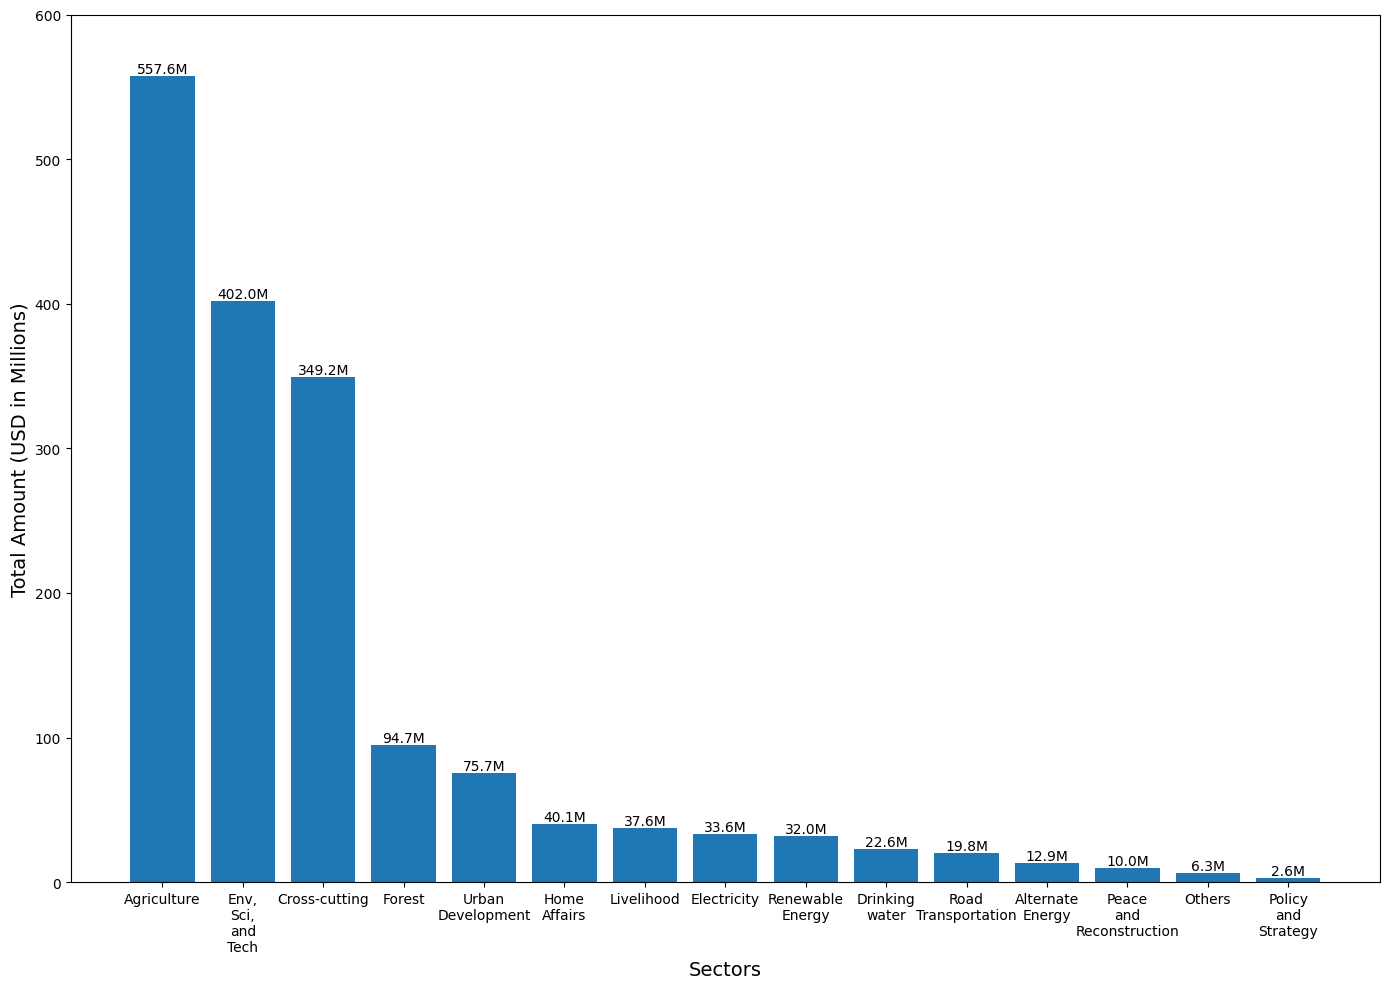

In [16]:
import matplotlib.pyplot as plt

# Data
sectors = [
    "Agriculture",
    "Env, Sci, and Tech",
    "Cross-cutting",
    "Forest",
    "Urban Development",
    "Home Affairs",
    "Livelihood",
    "Electricity",
    "Renewable Energy",
    "Drinking water",
    "Road Transportation",
    "Alternate Energy",
    "Peace and Reconstruction",
    "Others",
    "Policy and Strategy"
]

values = [
    557.6, 402.0, 349.2, 94.7, 75.7,
    40.1, 37.6, 33.6, 32.0, 22.6,
    19.8, 12.9, 10.0, 6.3, 2.6
]

# Function to split into exactly two lines

def split_two_lines(label):
    words = label.split()
    return "\n".join(words)

    return label

# Apply splitting
wrapped_sectors = [split_two_lines(sector) for sector in sectors]

# Plot
plt.figure(figsize=(14,10))
bars = plt.bar(wrapped_sectors, values)

# Add value labels
for bar, value in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{value}M",
        ha='center',
        va='bottom',
        
    )

# Labels
plt.ylabel("Total Amount (USD in Millions)", fontsize = 14)
plt.xlabel("Sectors", fontsize = 14)

# IMPORTANT: No rotation
plt.xticks(rotation=0)

plt.ylim(0, 600)
plt.tight_layout()
plt.show()
